In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("Set2")

%matplotlib inline

In [2]:
# !pip install seaborn

In [3]:
def classify_answers(df, q, a1, a2):
    if df[q] == a1:
        return 'no'
    elif df[q] == a2:
        return 'no se'
    else : 
        return 'si'

# Read data

In [4]:
df = pd.read_csv("../data/respuestas.csv")
df.shape

(144, 17)

In [5]:
df.head().transpose()

,0,1,2,3,4
timestamp,3/12/2021 19:15:01,3/17/2021 21:12:19,3/18/2021 21:28:35,3/26/2021 22:14:29,4/19/2021 13:40:42
q_edad,10,9,10,9,9
q_genero,f,f,m,f,f
q_donde_compu,a_donde_compu_casa,a_donde_compu_casa,a_donde_compu_casa,a_donde_compu_casa,a_donde_compu_casa
q_que_haces_compu,"a_que_haces_compu_videos, a_que_haces_compu_tarea",a_que_haces_compu_juegos,a_que_haces_compu_videos,"a_que_haces_compu_juegos, a_que_haces_compu_vi...","a_que_haces_compu_juegos, a_que_haces_compu_vi..."
q_donde_aprendiste_compu,a_donde_aprendiste_compu_casa,a_donde_aprendiste_compu_solo,a_donde_aprendiste_compu_escuela,"a_donde_aprendiste_compu_casa, a_donde_aprendi...",a_donde_aprendiste_compu_casa
q_que_celu_usas,a_que_celu_usas_propio,a_que_celu_usas_propio,a_que_celu_usas_propio,a_que_celu_usas_prestado,a_que_celu_usas_propio
q_que_haces_celu,"a_que_haces_celu_chat, a_que_haces_celu_videos...",a_que_haces_celu_redes,a_que_haces_celu_juegos,"a_que_haces_celu_chat, a_que_haces_celu_telefo...",a_que_haces_celu_chat
q_yt,a_yt_1compu,a_yt_1compu,a_yt_muchascompu,a_yt_nose,a_yt_celular
q_acceso_fotos,a_acceso_fotos_yoyotros,a_acceso_fotos_yo,a_acceso_fotos_yo,a_acceso_fotos_yoyotros,a_acceso_fotos_yo


# Descripción del grupo

A continuación se describe el grupo encuestado según distintas variables poblacionales. 


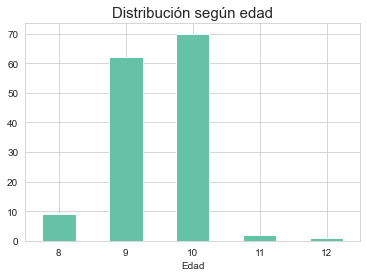

In [6]:
# Participantes por Edad

df["q_edad"].value_counts().sort_index().plot.bar(rot=0)
plt.xlabel("Edad")
plt.title("Distribución según edad", fontsize=15);

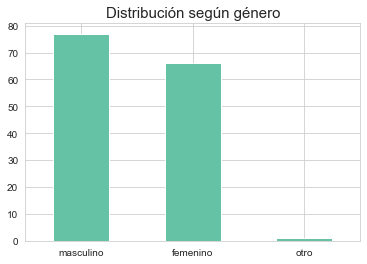

In [7]:
# Participantes por Género

df["q_genero"].value_counts().plot.bar(rot=0)
plt.xticks([0, 1, 2], ['masculino', 'femenino', 'otro'])
plt.title("Distribución según género", fontsize=15);

Podemos ver que se trata de un grupo bastante homogéneo en cuanto a la edad, en tanto es el objeto de nuestro estudio el grupo comprendido por niños y niñas de alrededor de diez años. En tanto al género tenemos una muy buena distribución también.

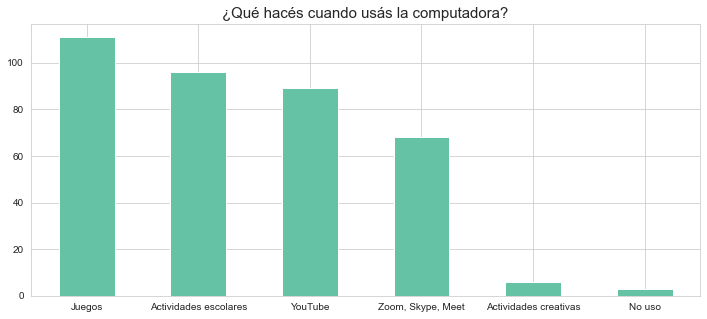

In [8]:
# ¿Qué hacés cuando usás la computadora (podés elegir más de una opción)?
positions = (0, 1, 2, 3, 4, 5)
labels = ("Juegos", "Actividades escolares", "YouTube", "Zoom, Skype, Meet", "Actividades creativas", "No uso")

df["q_que_haces_compu"].str.replace(" ", "").str.get_dummies(sep=',') \
    .sum().sort_values(ascending=False).plot.bar(figsize=(12,5))
plt.title("¿Qué hacés cuando usás la computadora?", fontsize=15);
plt.xticks(positions, labels,rotation=0);


Queda claro que la mayor parte de los participantes utilizan la computadora en su casa. Siendo que tanto este año como el anterior vivimos en un contexto de pandemia, este resultado no resulta sorprendente.

Podemos destacar que la mayor parte de los niños y niñas parecieran contar con una computadora en sus hogares, siendo tan solo uno de ellos quien respondió que no poseía una.

También les preguntamos para qué utilizan más comúnmente la computadora. Les dimos la posibilidad de marcar más de una opción dentro de una serie de respuestas y al mismo tiempo, dejamos espacio disponible para poder completar con otras actividades que no estuvieran dentro de las que les habíamos propuesto.

Por otro lado, la mayoría utiliza la computadora para jugar juegos, siendo las siguientes actividades más usuales mirar videos en YouTube, realizar videollamadas utilizando Skype, Meet o Zoom y realizar actividades escolares. Nuevamente, esto tiene sentido siendo que durante todo el 2020 en Argentina hubo clases de manera virtual.

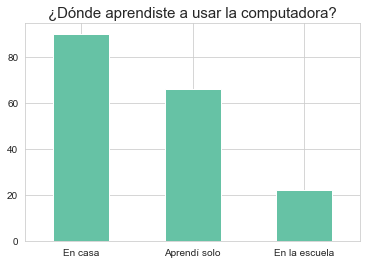

In [9]:
#¿Dónde aprendiste a usar la computadora? 

positions = (0, 1, 2)
labels = ("En casa", "Aprendí solo", "En la escuela")


df["q_donde_aprendiste_compu"].str.replace(" ", "").str.get_dummies(sep=',') \
    .sum().sort_values(ascending=False).plot.bar()
plt.title("¿Dónde aprendiste a usar la computadora?", fontsize=15);

plt.xticks(positions, labels,rotation=0);


En cuanto a la forma en la que aprendieron a usar la computadora, podemos ver que las opciones más elegidas son _"Me enseñaron en mi casa (mis padres, hermanos u otro familiar)"_ y _"Aprendí solo"_. 

Podemos ver que la tendencia está claramente más orientada a la formación recibida en el hogar, tanto por la enseñanza directa por parte de la familia o bien tal vez por la observación o la experiencia indirecta, al ver a otros miembros de la familia. 

Esta hipótesis es respaldada por otros estudios anteriores, como por ejemplo el de Mertala [8] _“Young children's perceptions of ubiquitous computing and the Internet of Things”_ donde explica que el conocimiento de los chicos sobre las distintas tecnologías se basa en el contacto que tuvieron con éstas a través de sus padres, hermanos u otras figuras del entorno familiar o escolar. 

De esta forma, esta percepción de haber "aprendido solos" podría tener raíz en este contacto indirecto.

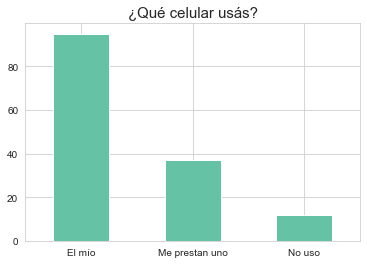

In [10]:
#¿Qué celular usás?

positions = (0, 1, 2)
labels = ("El mío", "Me prestan uno", "No uso")

df["q_que_celu_usas"].value_counts().plot.bar()
plt.title("¿Qué celular usás?", fontsize=15)
plt.xticks(positions, labels,rotation=0);


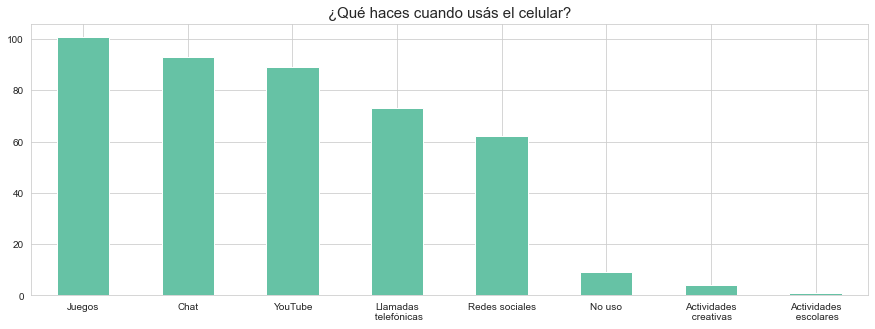

In [11]:
# Si usás celular: ¿qué haces cuando usás el celular? (podés elegir más de una opción)

positions = (0, 1, 2, 3, 4, 5, 6, 7)
labels = ("Juegos", "Chat", "YouTube", "Llamadas\n telefónicas", "Redes sociales", \
          "No uso", "Actividades\n creativas", "Actividades\n escolares")

df["q_que_haces_celu"].str.replace(" ", "").str.get_dummies(sep=',') \
    .sum().sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.title("¿Qué haces cuando usás el celular?", fontsize=15);
plt.xticks(positions, labels,rotation=0);


Al indagar en la forma en que los chicos y chicas utilizan los celulares nos encontramos con que la gran mayoría cuenta con un dispositivo propio.

La actividad más realizada es nuevamente jugar juegos, pero se suma con mucha importancia también el chat (utilizando aplicaciones de mensajería tales como Whatsapp, Telegram, etc) y mirar videos en YouTube.

Es llamativo que haya aparecido _"Llamadas telefónicas"_ como una actividad de una importancia considerable, aunque cabe preguntarse si habría que haber pedido que especifiquen si se referían videollamadas utilizando las aplicaciones anteriormente mencionadas, y en tal caso la actividad "Chat" cobraría aún más relevancia.

Dentro de _"Redes Sociales"_ se incluyen ejemplos como TikTok, Instagram y Facebook, aunque no les pedimos que especifiquen ninguna en particular. Sin embargo, sabemos por la consulta realizada previamente a la confección de la encuesta que realizamos a los referentes pedagógicos de la Fundación Sadosky que trabajan para el Plan Ceibal, que la red social elegida por sobre las otras es en estos momentos TikTok.

Por último, cabe destacar que _"Actividades creativas"_ no fue una opción propuesta por nosotros en el cuestionario (tanto en esta pregunta como en la relacionada a las actividades realizadas con la computadora), sino que fue agregada por los chicos y chicas al momento de completar la encuesta. Dentro de este grupo, agrupamos respuestas que se referían a la edición de videos y fotos (tal vez para compartir en aplicaciones tales como TikTok o Instagram), escuchar música y escribir historias.

# Análisis exploratorio de misconceptions


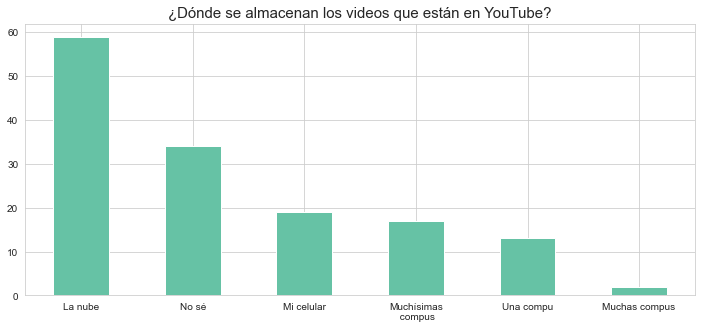

In [12]:
# ¿Dónde se almacenan los videos que están en YouTube?
positions = (0, 1, 2, 3, 4, 5)
labels = ("La nube", "No sé", "Mi celular", "Muchísimas\n compus", "Una compu", "Muchas compus")

df["q_yt"].value_counts().plot.bar(figsize=(12,5))
plt.title("¿Dónde se almacenan los videos que están en YouTube?", fontsize=15)
plt.xticks(positions, labels,rotation=0);

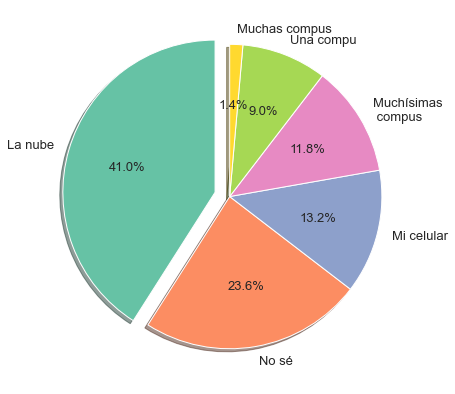

In [13]:
#plt.rc('xtick', labelsize=13) 
#plt.rc('ytick', labelsize=15) 
plt.rcParams['font.size'] = 13.0
labels = ("La nube", "No sé", "Mi celular", "Muchísimas\n compus", "Una compu", "Muchas compus")
explode = (0.1, 0, 0, 0, 0, 0)
df["q_yt"].value_counts().plot.pie(explode=explode,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, figsize=(12,7));
plt.gca().axes.get_yaxis().set_visible(False)


El primer tema a analizar es el almacenamiento de grandes volúmenes de datos en YouTube. Para esto le preguntamos a los chicos _"¿Dónde se almacenan los videos que están en YouTube?"_ y les dimos como opciones de respuesta _"En mi celular"_, _"En la nube"_, _"En una computadora"_, _"En muchas computadoras (tantas que podríamos llenar una casa)"_, _"En muchísimas computadoras (tantas que podríamos llenar una cancha de fútbol)"_ o bien _"No sé"_.

Podemos ver en un resultado inicial que la mayoría de ellos respondió _"En la nube"_. Esto es interesante porque el concepto de "Nube" es actualmente muy mencionado y por lo tanto está en el léxico de los chicos, a quienes seguramente Google les habrá ofrecido más de una vez _"más espacio de almacenamiento en la nube"_ (por nombrar un ejemplo). Sin embargo, cabe preguntarse si hay _misconceptions_ respecto de este tema puntual: ¿piensan la nube como algo etéreo? ¿Qué cantidad de información "entra" en la nube? ¿Cómo funciona? Este es sin duda un tema interesante para seguir investigando a futuro.

En siguiente lugar nos encontramos con la respuesta _"No sé"_. Esto deja en evidencia que éste es un tema sobre el cual no se han preguntado mucho, incluso siendo que mirar videos en YouTube es la tercer actividad más elegida (tanto en la computadora como en el celular). 

Luego nos encontramos con similar cantidad de respuestas con las opciones de _"En mi celular"_ y en _"Muchísimas computadoras (tantas que podríamos llenar una cancha de fútbol)"_. Por un lado, está la _misconception_ de que el almacenamiento se da a nivel local, y más aún, que la cantidad información a almacenar es tal que entraría en un celular. Por otro lado, nos encontramos con la respuesta que propusimos como correcta, en la que queremos transmitir la idea de información distribuida en gran escala.

Por último tenemos quienes opinaron que la información se guarda en una sola computadora, con la idea de almacenamiento no distribuido, pero tal vez con más capacidad que un celular, y en _"En muchas computadoras (tantas que podríamos llenar una casa)"_, donde quisimos transmitir una noción de almacenamiento distribuido pero a una escala menor que en la opción de "**Muchísimas** computadoras" (tal vez incluso llevarlos a pensar en que las muchas computadoras podrían encontrarse en una oficina de YouTube o Google, pero todas en un mismo lugar físico).





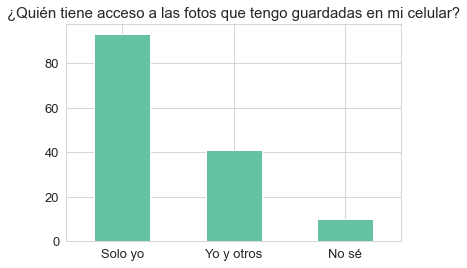

In [14]:
# ¿Quién tiene acceso a las fotos que tengo guardadas en mi celular?
positions = (0, 1, 2)
labels = ("Solo yo", "Yo y otros", "No sé")

df["q_acceso_fotos"].value_counts().plot.bar()
plt.title("¿Quién tiene acceso a las fotos que tengo guardadas en mi celular?", fontsize=15)
plt.xticks(positions, labels, rotation=0);

La siguiente _misconception_ que queremos analizar es cómo es el mecanismo para compartir un archivo por WhatsApp. 

En particular, vamos a profundizar en sí, al compartir una imágen por este medio se genera una copia de la misma o bien se comparte "por referencia". 

Para esto, la primer pregunta que les hacemos es _"¿Quién tiene acceso a las fotos que tengo guardadas en mi celular?"_. Como vemos, la mayor parte de quienes entrevistamos respondió correctamente _"Solo yo"_. Si bien por como está planteada la pregunta es posible que dieramos una sensación cuál era la respuesta correcta, la idea fue poder armar un camino de razonamiento como el siguiente:

1. En primer lugar, quién tiene acceso a los archivos que tengo guardados en mi celular.
2. ¿Cuando comparto por WhatsApp un archivo que tenía guardado: se genera una copia o se muestra una referencia a mi archivo?
3. Y por último: ¿qué pasa si ya no quiero compartir ese archivo? ¿Es posible? ¿Puedo perder la propiedad de un archivo que compartí por WhatsApp?

Veamos entonces en la siguiente pregunta el punto 2.


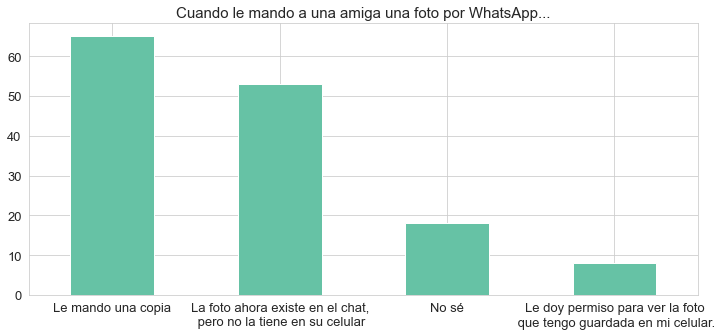

In [15]:
# Cuando le mando a una amiga una foto por WhatsApp...
positions = (0, 1, 2, 3)
labels = ("Le mando una copia", \
          "La foto ahora existe en el chat,\n pero no la tiene en su celular", \
          "No sé", \
          "Le doy permiso para ver la foto\n que tengo guardada en mi celular.")


df["q_mandar_fotos"].value_counts().plot.bar(figsize=(12,5))
plt.title("Cuando le mando a una amiga una foto por WhatsApp...", fontsize=15)
plt.xticks(positions, labels, rotation=0);


Acá podemos ver que es bastante pareja la cantidad de niños y niñas que opinan, por un lado, que cuando se envía una foto, lo que se manda es una copia y por el otro, que esa foto "existe en WhatsApp" pero que la persona a la que se la enviaron no la tiene como copia en su celular. 

En esta última opción quisimos dar una idea de referencia, y dejar claro que el archivo compartido no le quedaría en forma de copia a la otra persona, si no que solo se podría acceder vía referencia. 

De todas maneras, a pesar de que la respuesta más elegida es la "correcta", el número de encuestados y encuestadas con y sin _misconceptions_ es similar. En el gráfico ()


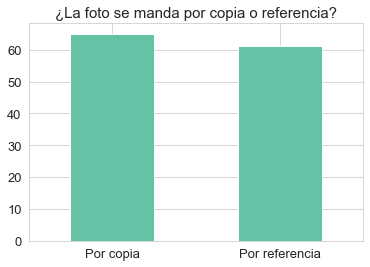

In [16]:
# Copia vs ref
positions = (0, 1)
labels = ("Por copia","Por referencia")
df["q_mandar_fotos_agrup"].value_counts()[:2].plot.bar();
plt.title("¿La foto se manda por copia o referencia?", fontsize=15);
plt.xticks(positions, labels, rotation=0);


Por _"copia"_ tomamos a los entrevistados que respondieron que al compartir la foto se manda una copia de la misma y por _"referencia"_ consideramos a la unión de los niños que eligieron las opciones _"Le doy permiso para ver la foto que tengo guardada en mi celular"_ y _"La foto ahora existe en WhatsApp y mi amiga la puede ver cuando mira nuestro chat, pero no la tiene en su celular"_. Para mayor claridad, dejamos afuera a quienes respondieron _"No sé"_.

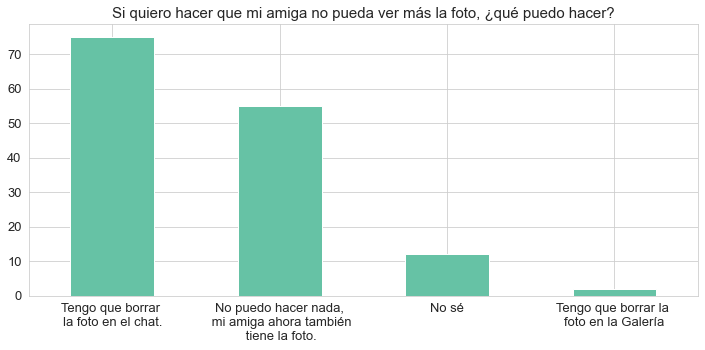

In [17]:
# Si quiero hacer que mi amiga no pueda ver más la foto, ¿qué puedo hacer?

positions = (0, 1, 2, 3)
labels = ("Tengo que borrar \nla foto en el chat.", \
          "No puedo hacer nada,\n mi amiga ahora también\n tiene la foto.", \
          "No sé", \
          "Tengo que borrar la \nfoto en la Galería")


df["q_borrar_fotos"].value_counts().plot.bar(figsize=(12,5))
plt.title("Si quiero hacer que mi amiga no pueda ver más la foto, ¿qué puedo hacer?", fontsize=15)

plt.xticks(positions, labels, rotation=0);



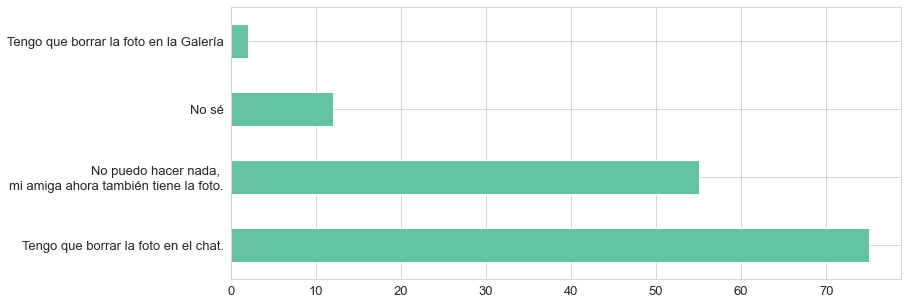

In [18]:
# Tamaño de la fuente

#plt.rc('xtick', labelsize=15) 
#plt.rc('ytick', labelsize=15) 
positions = (0, 1, 2, 3)
labels = ("Tengo que borrar la foto en el chat.", \
          "No puedo hacer nada, \nmi amiga ahora también tiene la foto.", \
          "No sé", \
          "Tengo que borrar la foto en la Galería")

df["q_borrar_fotos"].value_counts().plot.barh(figsize=(12,5));
plt.yticks(positions, labels, rotation=0);

Por último, como habíamos mencionado anteriormente en el punto 3, les preguntamos qué pueden hacer si quieren que la persona a la que le compartieron la foto no pueda acceder más a ella. 

Con esta pregunta, intentamos fijar los conceptos vistos anteriormente y dilucidar si la idea de copia y referencia estaba bien arraigada.

Al analizar los datos, nos encontramos con una sorpresa: si bien en las dos preguntas anteriores, la mayor parte de los niños y niñas encuestados había contestado correctamente dando a conocer que los archivos se envían como una copia cuando se comparten por WhatsApp, en esta pregunta mostraron tener una _misconception_.

La opción más elegida fue que para dejar de compartir esa foto bastaría con borrarla en el chat de WhatsApp. Esta respuesta da una idea de que hay una referencia de la foto existente en el servidor de WhatsApp y que al eliminar el mensaje con el archivo en el chat, es suficiente para quitarle el acceso a la otra persona a los datos previamente compartidos.

En contraste, la opción _"No puedo hacer nada, mi amiga ahora también tiene la foto y no tengo manera de sacársela"_ intentaba reflejar la idea de que el archivo es compartido mediante una copia, y que una vez que ésta es enviada a la otra persona, se pierde la propiedad sobre la misma y no es posible hacer nada al respecto.



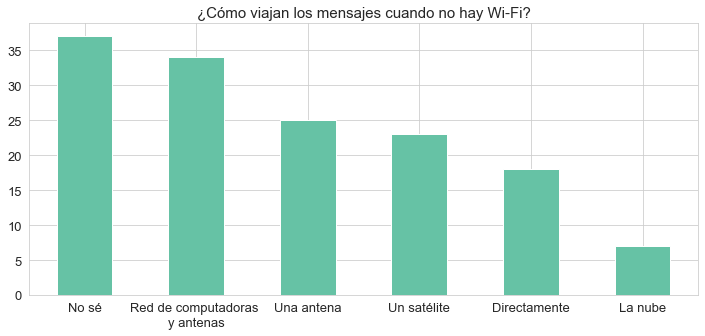

In [19]:
# Sofi está en la calle sin Wi-Fi y le quiere mandar un mensaje de WhatsApp a Santi.  ¿Cuál de las cinco imágenes representa mejor la manera en la que el mensaje viaja?


positions = (0, 1, 2, 3, 4, 5)
labels = ("No sé", \
          "Red de computadoras \ny antenas", \
          "Una antena", \
          "Un satélite", \
          "Directamente", 
          "La nube")


df["q_mensaje_sin_wifi"].value_counts().plot.bar(figsize=(12,5))
plt.title("¿Cómo viajan los mensajes cuando no hay Wi-Fi?", fontsize=15)

plt.xticks(positions, labels, rotation=0);


El siguiente tema que quisimos explorar fue el funcionamiento de la conectividad móvil, en particular, indagamos sobre cómo viajan los mensajes de WhatsApp cuando no hay Wi-Fi.

Es llamativo que en esta pregunta, la opción más elegida fue _"No sé"_. A pesar de que la gran mayoría de los chicos cuenta con un teléfono celular propio o bien accede a uno que le prestan, vemos que no han llegado a conclusiones respecto a cómo funciona la tecnología de fondo.

De todas formas, una cantidad similar de niños y niñas respondieron a su vez correctamente al elegir la respuesta en la que se proponía que los mensajes viajan a través de una red de antenas y computadoras.

En una proporción semejante aparecen las respuestas en las que se indica que los mensajes viajan a través de una (única) antena, un satélite y "directamente" (dando a entender que no existe una infraestructura que intervenga en este proceso).


En la fig. 22 se muestra un agrupamiento de las respuestas que contienen una _misconception_ (en este caso, las que indican que los mensajes viajan a través de la nube, de un satélite, una única antena o directamente) en contraste con la respuesta "acertada" (que indicaba que el mensaje viajaba a través de una red de antenas y computadoras). Podemos ver que la proporción de niños y niñas con una _misconception_ en este tema es mayor (casi el doble) que la de los chicos y chicas que no.

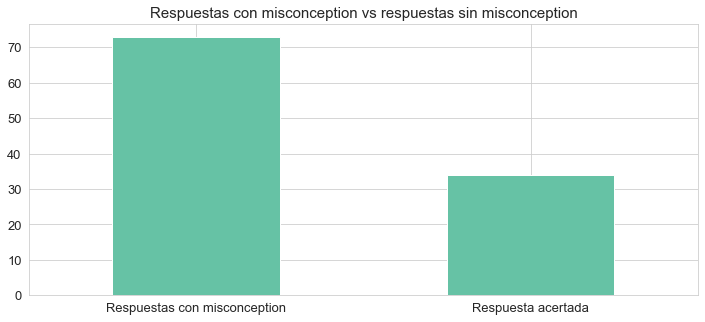

In [20]:
some_values = ['otras', 'red']
positions = (0, 1)
labels = ("Respuestas con misconception", \
          "Respuesta acertada")

df2 = df.loc[df['q_mensaje_sin_wifi_agrup'].isin(some_values)];
df2['q_mensaje_sin_wifi_agrup'].value_counts().plot.bar(figsize=(12,5));
plt.title("Respuestas con misconception vs respuestas sin misconception", fontsize=15)

plt.xticks(positions, labels, rotation=0);



Por último, cabe destacar que la opción de que viajan a través de _"La nube"_ fue la menos elegida. Y esto es un dato no menor, ya que como habíamos mencionado anteriormente, en la pregunta _¿Dónde se almacenan los videos que están en YouTube?"_ la respuesta más elegida fue justamente _"En la nube"_. Con esta información podemos desentrañar también un poco más cuáles son sus concepciones acerca de "la nube": un espacio de almacenamiento "etéreo" de datos más que un medio por el cual se envía y recibe información.

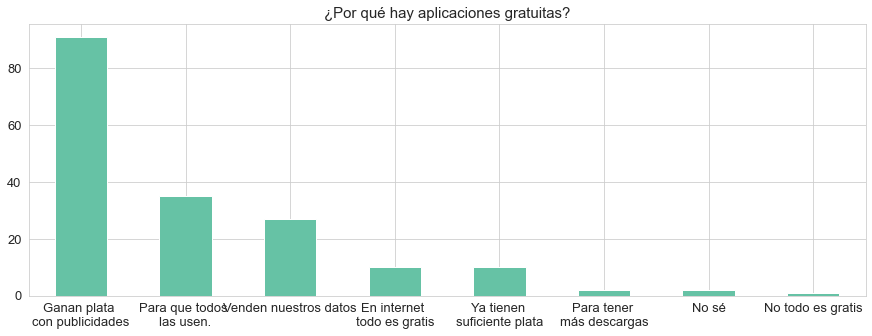

In [21]:
# ¿Por qué hay aplicaciones gratuitas?
positions = (0, 1, 2, 3, 4, 5, 6, 7)
labels = ("Ganan plata \ncon publicidades", \
          "Para que todos \nlas usen.", \
          "Venden nuestros datos", \
          "En internet \ntodo es gratis", \
          "Ya tienen \nsuficiente plata", \
          "Para tener \nmás descargas", \
          "No sé",
          "No todo es gratis")


df["q_gratuidad"].str.replace(" ", "").str.get_dummies(sep=',') \
    .sum().sort_values(ascending=False).plot.bar(figsize=(15,5))

plt.title("¿Por qué hay aplicaciones gratuitas?", fontsize=15)

plt.xticks(positions, labels, rotation=0);


Por último, nos interesaba conocer sus concepciones acerca del por qué de la gratuidad de algunas aplicaciones conocidas por ellos en Internet, tales como TikTok, YouTube, Facebook o Instagram. 

Ante la pregunta de _"¿Por qué hay aplicaciones gratuitas?"_, la gran mayoría eligió la opción que propone que la gratuidad de éstas es posible gracias al dinero que ganan con las publicidades que nos muestran. 

Las otras opciones que les habíamos planteado quedaron bastante por detrás en tanto a cantidad de chicos que las eligieron. 

Es interesante mencionar que en esta pregunta habíamos dejado un casillero libre para completar con otras opciones que se les pudiesen ocurrir y que no estuvieran disponibles. De esta forma, algunos completaron que las aplicaciones son gratis para poder conseguir así "más descargas en el Play Store". Según esta respuesta, las aplicaciones ganan más dinero cuantas más descargas consiguen.

La otra respuesta proporcionada por los chicos y chicas fue que _"No todo es gratis"_ en Internet, dando a entender que hay también aplicaciones que no son gratuitas.

In [22]:
df_gratuidad = df["q_gratuidad"].str.replace(" ", "").str.get_dummies(sep=',') \
    .sum().sort_values(ascending=False).reset_index()
df_gratuidad.columns = ['respuesta', 'cantidad']
df_gratuidad

,respuesta,cantidad
0,a_gratuidad_publicidades,91
1,a_gratuidad_paraquetodoslasusen,35
2,a_gratuidad_datos,27
3,a_gratuidad_todoeninternetesgratis,10
4,a_gratuidad_yatienenplata,10
5,a_gratuidad_descargas,2
6,a_gratuidad_nose,2
7,a_gratuidad_notodoesgratis,1


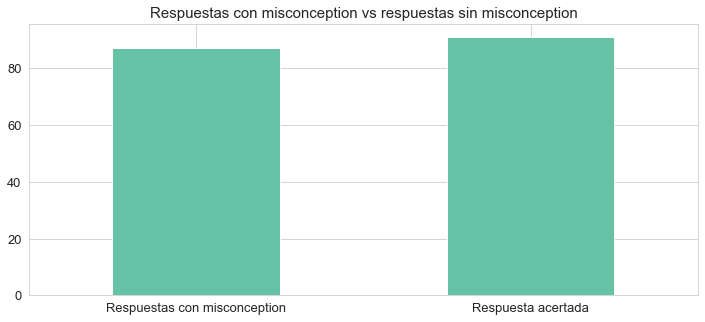

In [23]:
positions = (0, 1)
labels = ("Respuestas con misconception", \
          "Respuesta acertada")

df_gratuidad['respuesta_correcta'] = df_gratuidad['respuesta'] == 'a_gratuidad_publicidades'
df_gratuidad.groupby('respuesta_correcta').agg(np.sum) \
    .plot(kind='bar', legend=False, figsize=(12,5))

plt.title("Respuestas con misconception vs respuestas sin misconception", fontsize=15)
plt.xticks(positions, labels, rotation=0)
plt.xlabel("");

In [24]:
df.head().transpose()

,0,1,2,3,4
timestamp,3/12/2021 19:15:01,3/17/2021 21:12:19,3/18/2021 21:28:35,3/26/2021 22:14:29,4/19/2021 13:40:42
q_edad,10,9,10,9,9
q_genero,f,f,m,f,f
q_donde_compu,a_donde_compu_casa,a_donde_compu_casa,a_donde_compu_casa,a_donde_compu_casa,a_donde_compu_casa
q_que_haces_compu,"a_que_haces_compu_videos, a_que_haces_compu_tarea",a_que_haces_compu_juegos,a_que_haces_compu_videos,"a_que_haces_compu_juegos, a_que_haces_compu_vi...","a_que_haces_compu_juegos, a_que_haces_compu_vi..."
q_donde_aprendiste_compu,a_donde_aprendiste_compu_casa,a_donde_aprendiste_compu_solo,a_donde_aprendiste_compu_escuela,"a_donde_aprendiste_compu_casa, a_donde_aprendi...",a_donde_aprendiste_compu_casa
q_que_celu_usas,a_que_celu_usas_propio,a_que_celu_usas_propio,a_que_celu_usas_propio,a_que_celu_usas_prestado,a_que_celu_usas_propio
q_que_haces_celu,"a_que_haces_celu_chat, a_que_haces_celu_videos...",a_que_haces_celu_redes,a_que_haces_celu_juegos,"a_que_haces_celu_chat, a_que_haces_celu_telefo...",a_que_haces_celu_chat
q_yt,a_yt_1compu,a_yt_1compu,a_yt_muchascompu,a_yt_nose,a_yt_celular
q_acceso_fotos,a_acceso_fotos_yoyotros,a_acceso_fotos_yo,a_acceso_fotos_yo,a_acceso_fotos_yoyotros,a_acceso_fotos_yo


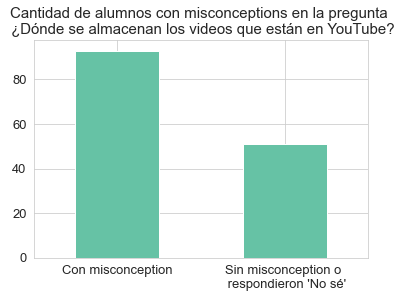

In [25]:
positions = (0, 1)
labels = ("Con misconception", \
          "Sin misconception o \n respondieron 'No sé'")

df['misconception_yt'] = np.where((df['q_yt']=='a_yt_muchisimascompu') | (df['q_yt']=='a_yt_nose'), 'no', 'si')

df["misconception_yt"].value_counts().plot.bar(rot=0);
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Dónde se almacenan los videos que están en YouTube?", \
          fontsize=15);
plt.xticks(positions, labels, rotation=0);




# Cómo puedo chequear que esto este bien?
# qué hay que hacer con los "no sé"?


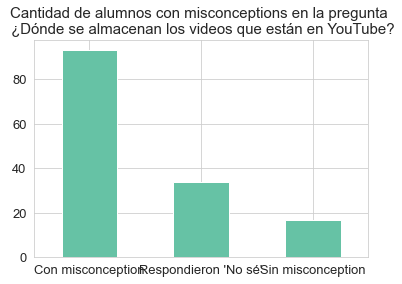

In [26]:
# vamos a separar el no se.
positions = (0, 1, 2)
labels = ("Con misconception", "Respondieron 'No sé'", "Sin misconception")

df['misconception_yt2'] = df.apply(lambda x: classify_answers(x, q='q_yt', a1='a_yt_muchisimascompu', a2='a_yt_nose'), axis=1)
df["misconception_yt2"].value_counts().plot.bar(rot=0);
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Dónde se almacenan los videos que están en YouTube?", \
          fontsize=15);
plt.xticks(positions, labels, rotation=0);




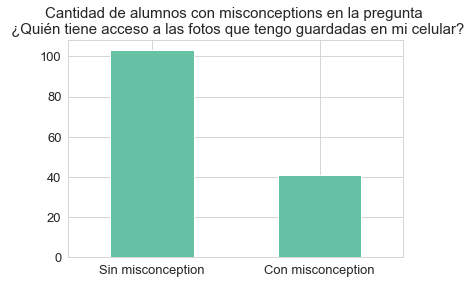

In [27]:
positions = (0, 1)
labels = ("Sin misconception", \
          "Con misconception")

df['misconception_acceso_fotos'] = np.where((df['q_acceso_fotos']=='a_acceso_fotos_yo') | (df['q_acceso_fotos']=='a_acceso_fotos_nose'), 'no', 'si')
df["misconception_acceso_fotos"].value_counts().plot.bar(rot=0);
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Quién tiene acceso a las fotos que tengo guardadas en mi celular?", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);


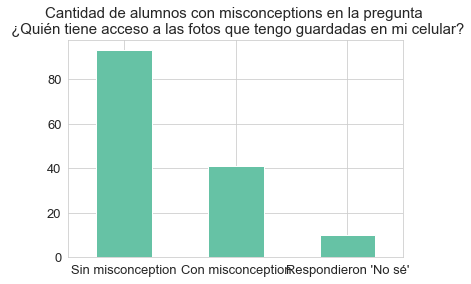

In [28]:
# vamos a separar el no se.
positions = (0, 1, 2)
labels = ("Sin misconception", "Con misconception", "Respondieron 'No sé'")

df['misconception_acceso_fotos2'] = df.apply(lambda x: classify_answers(x, q='q_acceso_fotos', a1='a_acceso_fotos_yo', a2='a_acceso_fotos_nose'), axis=1)
df["misconception_acceso_fotos2"].value_counts().plot.bar(rot=0);

plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Quién tiene acceso a las fotos que tengo guardadas en mi celular?", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);


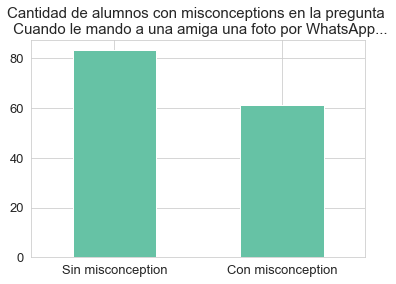

In [29]:
positions = (0, 1)
labels = ("Sin misconception", \
          "Con misconception")

df['misconception_mandar_fotos'] = np.where((df['q_mandar_fotos']=='a_mandar_fotos_copia') | (df['q_mandar_fotos']=='a_mandar_fotos_nose'), 'no', 'si')
df["misconception_mandar_fotos"].value_counts().plot.bar(rot=0);
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n Cuando le mando a una amiga una foto por WhatsApp...", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);

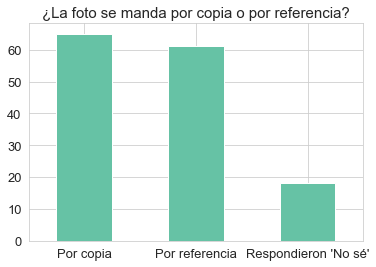

In [30]:
# vamos a separar el no se.
positions = (0, 1, 2)
labels = ("Por copia", "Por referencia", "Respondieron 'No sé'")

df['misconception_mandar_fotos2'] = df.apply(lambda x: classify_answers(x, q='q_mandar_fotos', a1='a_mandar_fotos_copia', a2='a_mandar_fotos_nose'), axis=1)
df["misconception_mandar_fotos2"].value_counts().plot.bar(rot=0);

plt.title("¿La foto se manda por copia o por referencia?", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);


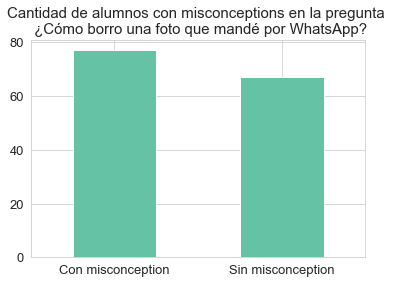

In [31]:
positions = (0, 1)
labels = ("Con misconception", \
          "Sin misconception")

df['misconception_borrar_fotos'] = np.where((df['q_borrar_fotos']=='a_borrar_fotos_nopuedo') | (df['q_borrar_fotos']=='a_borrar_fotos_nose'), 'no', 'si')
df["misconception_borrar_fotos"].value_counts().plot.bar(rot=0);
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Cómo borro una foto que mandé por WhatsApp?", \
          fontsize=15);
plt.xticks(positions, labels, rotation=0);

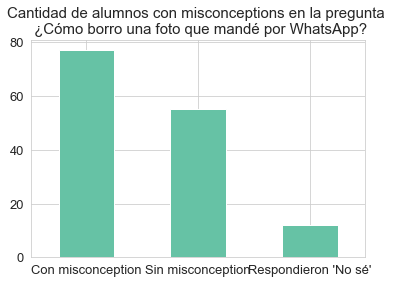

In [32]:
positions = (0, 1, 2)
labels = ("Con misconception", "Sin misconception", "Respondieron 'No sé'")




df['misconception_borrar_fotos2'] = df.apply(lambda x: classify_answers(x, q='q_borrar_fotos', a1='a_borrar_fotos_nopuedo', a2='a_borrar_fotos_nose'), axis=1)
df["misconception_borrar_fotos2"].value_counts().plot.bar(rot=0);

plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Cómo borro una foto que mandé por WhatsApp?", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);


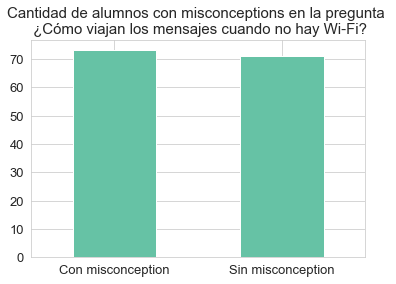

In [33]:
positions = (0, 1)
labels = ("Con misconception", \
          "Sin misconception")

df['misconception_mensaje_sin_wifi'] = np.where((df['q_mensaje_sin_wifi']=='a_mensaje_sin_wifi_red') | (df['q_mensaje_sin_wifi']=='a_mensaje_sin_wifi_nose'), 'no', 'si')
df["misconception_mensaje_sin_wifi"].value_counts().plot.bar(rot=0);
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Cómo viajan los mensajes cuando no hay Wi-Fi?", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);


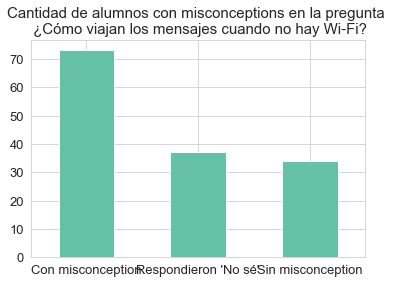

In [34]:
positions = (0, 1, 2)
labels = ("Con misconception", "Respondieron 'No sé'", "Sin misconception")


df['misconception_mensaje_sin_wifi2'] = df.apply(lambda x: classify_answers(x, q='q_mensaje_sin_wifi', a1='a_mensaje_sin_wifi_red', a2='a_mensaje_sin_wifi_nose'), axis=1)
df["misconception_mensaje_sin_wifi2"].value_counts().plot.bar(rot=0);

plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Cómo viajan los mensajes cuando no hay Wi-Fi?", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);

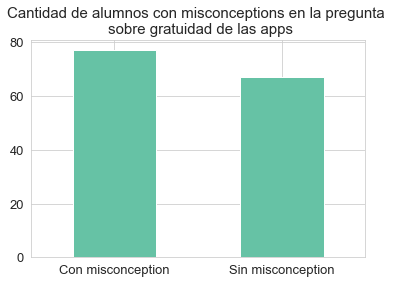

In [35]:
positions = (0, 1)
labels = ("Con misconception", \
          "Sin misconception")

df['misconception_gratuidad'] = np.where((df['q_gratuidad']=='a_gratuidad_publicidades'), 'no', 'si')
df["misconception_gratuidad"].value_counts().plot.bar(rot=0);
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n sobre gratuidad de las apps", \
          fontsize=15);
# Acá estoy considerando que NO tienen misconceptions solo a aquellos que contestaron UNICAMENTE que a_gratuidad_publicidades.
# Los que respondieron a_gratuidad_publicidades + otra cosa los considero incorrectos.

plt.xticks(positions, labels, rotation=0);

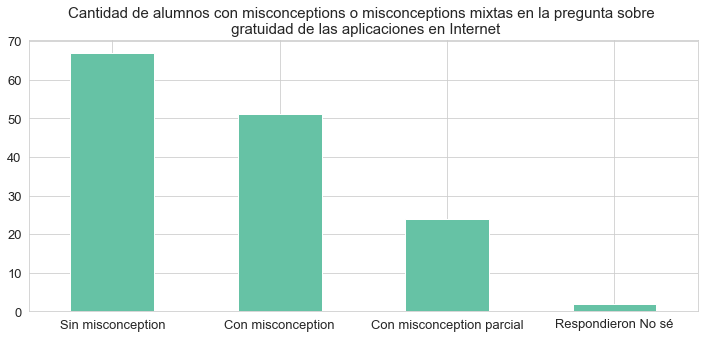

In [36]:
positions = (0, 1, 2, 3)
labels = ("Sin misconception", \
          "Con misconception", \
          "Con misconception parcial", \
          "Respondieron No sé")

def classify_answers_gratuidad_3grupos(df):
    if df['q_gratuidad'] == 'a_gratuidad_publicidades' : 
        return 'correcta'
    elif 'a_gratuidad_publicidades' in df['q_gratuidad'].replace(" ", "").split(',') :  # si la respuesta correcta esta dentro de las elegidas
        return 'mixta'
    elif df['q_gratuidad'] == 'a_gratuidad_nose':
        return 'no se'
    else : 
        return 'misconception'


df['misconception_gratuidad_grupos'] = df.apply(lambda x: classify_answers_gratuidad_3grupos(x), axis=1)

df["misconception_gratuidad_grupos"].value_counts().plot.bar(rot=0, figsize=(12,5));

plt.title("Cantidad de alumnos con misconceptions o misconceptions mixtas en la pregunta sobre \n gratuidad de las aplicaciones en Internet", \
        fontsize=15);

# Acá voy a dividir en 3: los que respondieron SOLO la respuesta correcta, Mixtos, Incorrectas y No se.


plt.xticks(positions, labels, rotation=0);

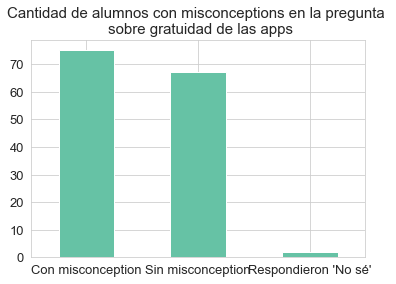

In [37]:
positions = (0, 1, 2)
labels = ("Con misconception", "Sin misconception", "Respondieron 'No sé'")

df['misconception_gratuidad2'] = df.apply(lambda x: classify_answers(x, q='q_gratuidad', a1='a_gratuidad_publicidades', a2='a_gratuidad_nose'), axis=1)
df["misconception_gratuidad2"].value_counts().plot.bar(rot=0);

plt.title("Cantidad de alumnos con misconceptions en la pregunta \n sobre gratuidad de las apps", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);

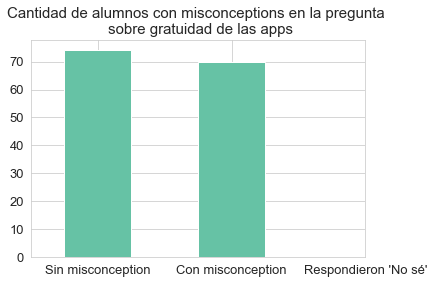

In [38]:
# aca considerando que la respuesta correcta puede venir entre otras incorrectas y separando los no sé

positions = (0, 1, 2)
labels = ("Sin misconception", "Con misconception", "Respondieron 'No sé'")



def classify_answers_gratuidad(df):
    if 'a_gratuidad_publicidades' in df['q_gratuidad'].split(',') :  # si la respuesta correcta esta dentro de las elegidas
        return 'no' #con misconception parcial NO Es misconception
    elif df['q_gratuidad'] == 'a_gratuidad_nose':
#        return 'no se'
        return 'no' # consideramos que no se NO es misconception
    else : 
        return 'si'
    
df['misconception_gratuidad3'] = df.apply(lambda x: classify_answers_gratuidad(x), axis=1)


df["misconception_gratuidad3"].value_counts().plot.bar(rot=0);
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n sobre gratuidad de las apps", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);


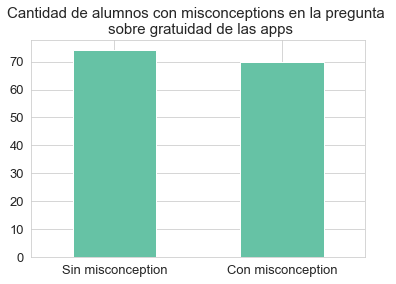

In [39]:
# aca considerando que la respuesta correcta puede venir entre otras incorrectas y separando los no sé

positions = (0, 1)
labels = ("Sin misconception", "Con misconception")



def classify_answers_gratuidad(df):
    if 'a_gratuidad_publicidades' in df['q_gratuidad'].split(',') :  # si la respuesta correcta esta dentro de las elegidas
        return 'no'
    elif df['q_gratuidad'] == 'a_gratuidad_nose':
        return 'no'
    else : 
        return 'si'
    
df['misconception_gratuidad3'] = df.apply(lambda x: classify_answers_gratuidad(x), axis=1)


df["misconception_gratuidad3"].value_counts().plot.bar(rot=0);
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n sobre gratuidad de las apps", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);


In [40]:
df['tiene_alguna_misconception'] = np.where((df['misconception_yt2']=='si')|
                                            (df['misconception_gratuidad3']=='si') | \
                                            (df['misconception_acceso_fotos2']=='si') | \
                                            (df['misconception_mandar_fotos2']=='si')  | \
                                            (df['misconception_borrar_fotos2']=='si')  | \
                                            (df['misconception_mensaje_sin_wifi2']=='si'), 'si', 'no')

In [41]:
df[df['tiene_alguna_misconception'] == 'no']
# hay solo 5 chicos que no tiene ninguna misconception

,timestamp,q_edad,q_genero,q_donde_compu,q_que_haces_compu,q_donde_aprendiste_compu,q_que_celu_usas,q_que_haces_celu,q_yt,q_acceso_fotos,...,misconception_mandar_fotos2,misconception_borrar_fotos,misconception_borrar_fotos2,misconception_mensaje_sin_wifi,misconception_mensaje_sin_wifi2,misconception_gratuidad,misconception_gratuidad_grupos,misconception_gratuidad2,misconception_gratuidad3,tiene_alguna_misconception
47,4/19/2021 16:37:01,9,f,a_donde_compu_casa,"a_que_haces_compu_videos, a_que_haces_compu_ta...",a_donde_aprendiste_compu_casa,a_que_celu_usas_propio,"a_que_haces_celu_chat, a_que_haces_celu_redes,...",a_yt_nose,a_acceso_fotos_yo,...,no,no,no,no,no se,no,correcta,no,no,no
73,4/25/2021 5:12:01,10,m,a_donde_compu_casa,"a_que_haces_compu_juegos, a_que_haces_compu_vi...",a_donde_aprendiste_compu_casa,a_que_celu_usas_propio,"a_que_haces_celu_videos, a_que_haces_celu_juegos",a_yt_nose,a_acceso_fotos_yo,...,no,no,no,no,no,no,correcta,no,no,no
76,4/25/2021 20:09:06,9,f,a_donde_compu_casa,"a_que_haces_compu_videos, a_que_haces_compu_tarea",a_donde_aprendiste_compu_casa,a_que_celu_usas_prestado,"a_que_haces_celu_redes, a_que_haces_celu_video...",a_yt_nose,a_acceso_fotos_yo,...,no se,no,no se,no,no se,no,correcta,no,no,no
79,4/25/2021 23:28:42,10,m,a_donde_compu_casa,a_que_haces_compu_tarea,a_donde_aprendiste_compu_solo,a_que_celu_usas_nouso,a_que_haces_celu_nouso,a_yt_nose,a_acceso_fotos_yo,...,no,no,no,no,no,no,correcta,no,no,no
112,5/2/2021 23:59:27,9,m,a_donde_compu_casa,"a_que_haces_compu_juegos, a_que_haces_compu_vi...",a_donde_aprendiste_compu_solo,a_que_celu_usas_prestado,"a_que_haces_celu_chat, a_que_haces_celu_videos...",a_yt_muchisimascompu,a_acceso_fotos_yo,...,no,no,no,no,no,no,correcta,no,no,no


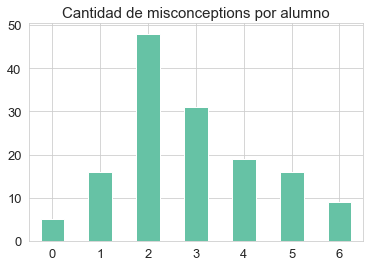

In [42]:
# ahora voy a contar cuantas misconception hay por chico 
# Los que respondieron no se se cuentan como correcto.
# El total de misconceptions que analizamos son 6. Vemos que lo comun era tener 2 misconceptions.

def count_misconceptions(df):
    cant_misconceptions = 0
    if df['misconception_yt2'] == 'si':
        cant_misconceptions+=1
    if df['misconception_acceso_fotos2'] == 'si':
        cant_misconceptions+=1
    if df['misconception_mandar_fotos2'] == 'si':   
        cant_misconceptions+=1
    if df['misconception_borrar_fotos2'] == 'si':
        cant_misconceptions+=1
    if df['misconception_mensaje_sin_wifi2'] == 'si':
        cant_misconceptions+=1
    if df['misconception_gratuidad3'] == 'si': # consideramos misconception parcial como SIN MISCONCEPTION y NO SE como SIN MISCONCEPTION
        cant_misconceptions+=1    
    return cant_misconceptions

df['cantidad_de_misconceptions'] = df.apply(lambda x: count_misconceptions(x), axis=1)

df["cantidad_de_misconceptions"].value_counts().sort_index().plot.bar(rot=0);
plt.title("Cantidad de misconceptions por alumno", \
          fontsize=15);


# OTra forma
# df_misconceptions.sum(axis=1).plot.hist(bins=7)



In [43]:
df["cantidad_de_misconceptions"].value_counts().sort_index()

0     5
1    16
2    48
3    31
4    19
5    16
6     9
Name: cantidad_de_misconceptions, dtype: int64

In [44]:
df[df['tiene_alguna_misconception'] == 'no'].transpose()

,47,73,76,79,112
timestamp,4/19/2021 16:37:01,4/25/2021 5:12:01,4/25/2021 20:09:06,4/25/2021 23:28:42,5/2/2021 23:59:27
q_edad,9,10,9,10,9
q_genero,f,m,f,m,m
q_donde_compu,a_donde_compu_casa,a_donde_compu_casa,a_donde_compu_casa,a_donde_compu_casa,a_donde_compu_casa
q_que_haces_compu,"a_que_haces_compu_videos, a_que_haces_compu_ta...","a_que_haces_compu_juegos, a_que_haces_compu_vi...","a_que_haces_compu_videos, a_que_haces_compu_tarea",a_que_haces_compu_tarea,"a_que_haces_compu_juegos, a_que_haces_compu_vi..."
q_donde_aprendiste_compu,a_donde_aprendiste_compu_casa,a_donde_aprendiste_compu_casa,a_donde_aprendiste_compu_casa,a_donde_aprendiste_compu_solo,a_donde_aprendiste_compu_solo
q_que_celu_usas,a_que_celu_usas_propio,a_que_celu_usas_propio,a_que_celu_usas_prestado,a_que_celu_usas_nouso,a_que_celu_usas_prestado
q_que_haces_celu,"a_que_haces_celu_chat, a_que_haces_celu_redes,...","a_que_haces_celu_videos, a_que_haces_celu_juegos","a_que_haces_celu_redes, a_que_haces_celu_video...",a_que_haces_celu_nouso,"a_que_haces_celu_chat, a_que_haces_celu_videos..."
q_yt,a_yt_nose,a_yt_nose,a_yt_nose,a_yt_nose,a_yt_muchisimascompu
q_acceso_fotos,a_acceso_fotos_yo,a_acceso_fotos_yo,a_acceso_fotos_yo,a_acceso_fotos_yo,a_acceso_fotos_yo


In [45]:
df_misconceptions = df[['misconception_yt', 
                        'misconception_acceso_fotos', 
                        'misconception_mandar_fotos', 
                        'misconception_borrar_fotos', 
                        'misconception_mensaje_sin_wifi', 
                        'misconception_gratuidad3']].copy() # consideramos misconception parcial como SIN MISCONCEPTION y NO SE como SIN MISCONCEPTION


for col in df_misconceptions.columns:
    df_misconceptions[col] = df_misconceptions[col].transform(lambda x: 1.0 if x == 'si' else 0.0)
df_misconceptions.head()

,misconception_yt,misconception_acceso_fotos,misconception_mandar_fotos,misconception_borrar_fotos,misconception_mensaje_sin_wifi,misconception_gratuidad3
0,1.0,1.0,1.0,1.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0,1.0


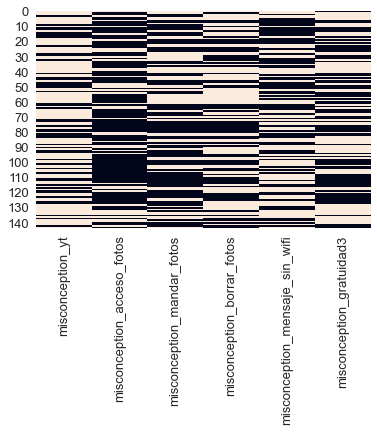

In [46]:
sns.heatmap(df_misconceptions, cbar=False);

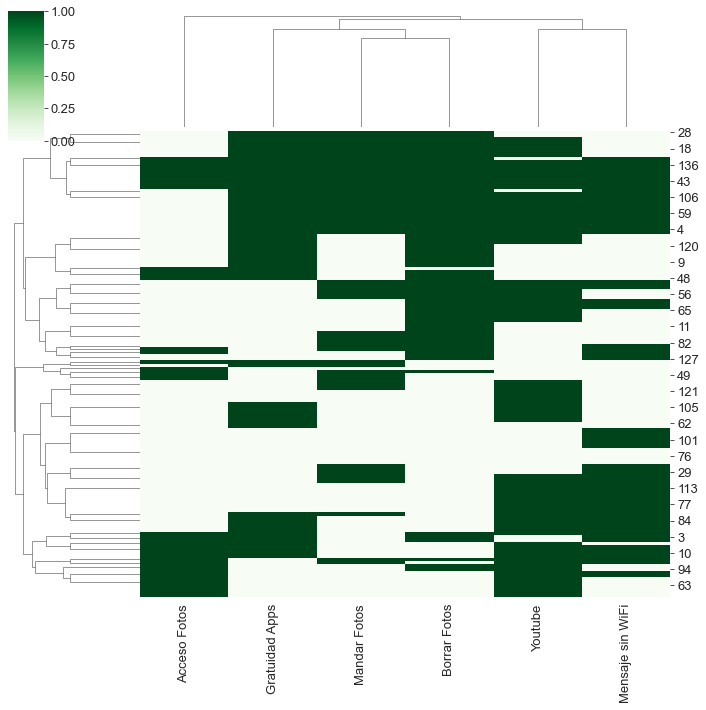

In [47]:
#https://seaborn.pydata.org/generated/seaborn.clustermap.html

df_misconceptions = df_misconceptions.rename(columns={"misconception_yt": "Youtube",
                                  "misconception_acceso_fotos": "Acceso Fotos",
                                  "misconception_mandar_fotos": "Mandar Fotos",
                                  "misconception_borrar_fotos": "Borrar Fotos",
                                  "misconception_mensaje_sin_wifi": "Mensaje sin WiFi",
                                  "misconception_gratuidad3": "Gratuidad Apps"})

sns.clustermap(df_misconceptions, cmap='Greens');

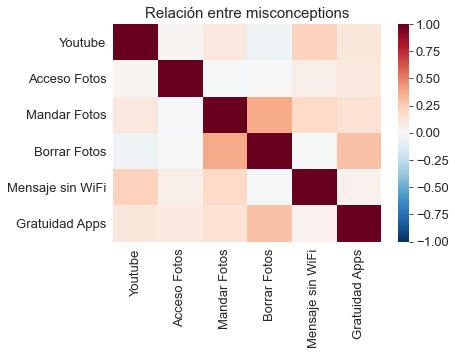

In [48]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html

#plt.rc('xtick', labelsize=15) 
#plt.rc('ytick', labelsize=15) 

ax = plt.axes()
sns.heatmap(df_misconceptions.corr(method='pearson'), ax=ax, vmax=1, vmin=-1, cmap='RdBu_r');
ax.set_title('Relación entre misconceptions', fontsize=15)
plt.show()

# * pearson : standard correlation coefficient
# * kendall : Kendall Tau correlation coefficient
# * spearman : Spearman rank correlation


In [49]:
df_misconceptions.columns

Index(['Youtube', 'Acceso Fotos', 'Mandar Fotos', 'Borrar Fotos',
       'Mensaje sin WiFi', 'Gratuidad Apps'],
      dtype='object')

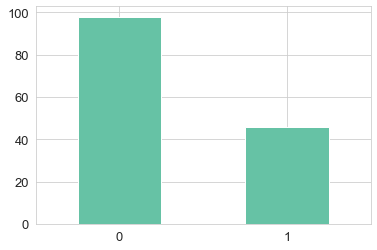

In [50]:
def tienen_ambas_misconceptions(df_misconceptions) :
    if (df_misconceptions['Borrar Fotos'] == 1) & (df_misconceptions['Mandar Fotos'] == 1):
        return 1
    return 0
    
df_misconceptions['mandar_y_borrar'] = df_misconceptions.apply(lambda x: tienen_ambas_misconceptions(x), axis=1)

df_misconceptions['mandar_y_borrar'].value_counts().sort_index().plot.bar(rot=0);

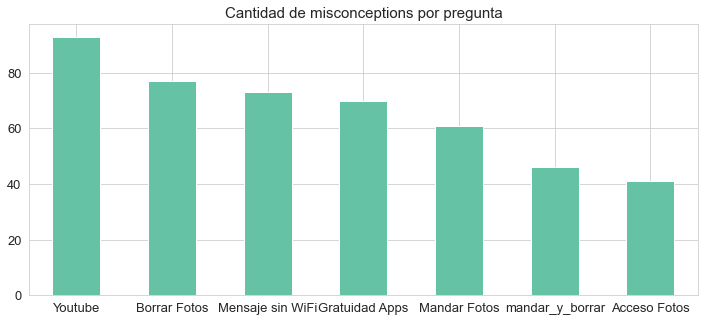

In [51]:
df_misconceptions.sum(axis=0).sort_values(ascending=False).plot.bar(figsize=(12,5), rot=0)
plt.title("Cantidad de misconceptions por pregunta", fontsize=15);

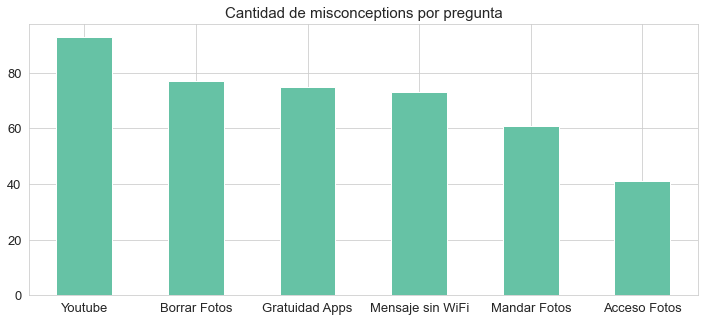

In [52]:
#aca Consideramos a los que tienen misconception parcial como CON misconception.

#https://seaborn.pydata.org/generated/seaborn.clustermap.html
df_misconceptions_parcial = df[['misconception_yt', 
                        'misconception_acceso_fotos', 
                        'misconception_mandar_fotos', 
                        'misconception_borrar_fotos', 
                        'misconception_mensaje_sin_wifi', 
                        'misconception_gratuidad2']].copy() # ACA MISCONCEPTION PARCIAL ES MISCONCEPTION

for col in df_misconceptions_parcial.columns:
    df_misconceptions_parcial[col] = df_misconceptions_parcial[col].transform(lambda x: 1.0 if x == 'si' else 0.0)
df_misconceptions_parcial.head()


df_misconceptions_parcial = df_misconceptions_parcial.rename(columns={"misconception_yt": "Youtube",
                                  "misconception_acceso_fotos": "Acceso Fotos",
                                  "misconception_mandar_fotos": "Mandar Fotos",
                                  "misconception_borrar_fotos": "Borrar Fotos",
                                  "misconception_mensaje_sin_wifi": "Mensaje sin WiFi",
                                  "misconception_gratuidad2": "Gratuidad Apps"})

df_misconceptions_parcial

df_misconceptions_parcial.sum(axis=0).sort_values(ascending=False).plot.bar(figsize=(12,5), rot=0)
plt.title("Cantidad de misconceptions por pregunta", fontsize=15);

In [53]:

df_yt_vs_wifi =  df[['q_yt', 'q_mensaje_sin_wifi']].copy()
df_yt_vs_wifi


,q_yt,q_mensaje_sin_wifi
0,a_yt_1compu,a_mensaje_sin_wifi_directo
1,a_yt_1compu,a_mensaje_sin_wifi_nube
2,a_yt_muchascompu,a_mensaje_sin_wifi_red
3,a_yt_nose,a_mensaje_sin_wifi_directo
4,a_yt_celular,a_mensaje_sin_wifi_directo
...,...,...
139,a_yt_celular,a_mensaje_sin_wifi_antena
140,a_yt_celular,a_mensaje_sin_wifi_nose
141,a_yt_nube,a_mensaje_sin_wifi_nube
142,a_yt_nose,a_mensaje_sin_wifi_nose


In [54]:
df_binary = pd.concat([pd.get_dummies(df_yt_vs_wifi['q_yt']), 
                    pd.get_dummies(df_yt_vs_wifi['q_mensaje_sin_wifi'])], 
                   axis=1)

df_binary = df_binary.rename(columns={"a_yt_1compu": "YouTube - Una compu",
                                  "a_yt_celular": "YouTube - Celular",
                                  "a_yt_muchascompu": "YouTube - Muchas compus",
                                  "a_yt_muchisimascompu": "YouTube - Muchísimas compus",
                                  "a_yt_nose": "YouTube - No sé",
                                  "a_yt_nube": "YouTube - Nube",
                                  "a_mensaje_sin_wifi_antena": "Sin WiFi - Antena",
                                  "a_mensaje_sin_wifi_directo": "Sin WiFi - Directamente",
                                  "a_mensaje_sin_wifi_nose": "Sin WiFi - No sé",
                                  "a_mensaje_sin_wifi_nube": "Sin WiFi - Nube",
                                  "a_mensaje_sin_wifi_red": "Sin WiFi - Red",
                                  "a_mensaje_sin_wifi_satelite": "Sin WiFi - Satélite"})

df_binary.head()

,YouTube - Una compu,YouTube - Celular,YouTube - Muchas compus,YouTube - Muchísimas compus,YouTube - No sé,YouTube - Nube,Sin WiFi - Antena,Sin WiFi - Directamente,Sin WiFi - No sé,Sin WiFi - Nube,Sin WiFi - Red,Sin WiFi - Satélite
0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0


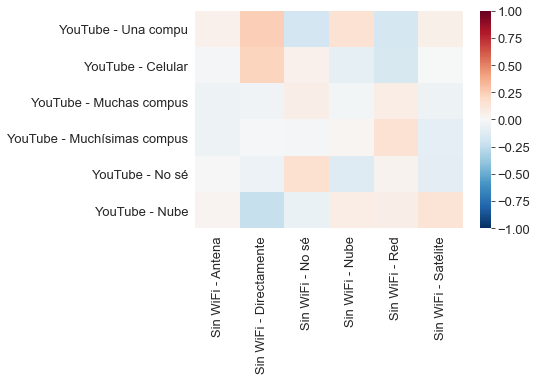

In [55]:
sns.heatmap(df_binary.corr().iloc[:6,6:], cmap='RdBu_r', vmax=1, vmin=-1);

In [56]:
cross_tab_result = pd.crosstab(index=df_binary['YouTube - Una compu'], columns=df_binary['Sin WiFi - Directamente'])
cross_tab_result

Sin WiFi - Directamente,0,1
YouTube - Una compu,,
0,118,13
1,8,5


In [57]:
#https://medium.com/swlh/how-to-run-chi-square-test-in-python-4e9f5d10249d
    
from scipy.stats import chi2_contingency

# chi2 : float
#     The test statistic.
# p : float
#     The p-value of the test
# dof : int
#     Degrees of freedom
# expected : ndarray, same shape as `observed`
#     The expected frequencies, based on the marginal sums of the table.

chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)

In [58]:
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")

chi square result: 0.01 (chi2: 6.39)


In [59]:
expected

array([[114.625,  16.375],
       [ 11.375,   1.625]])

In [60]:
cross_tab_result = pd.crosstab(index=df_binary['YouTube - Celular'], columns=df_binary['Sin WiFi - Directamente'])
cross_tab_result

Sin WiFi - Directamente,0,1
YouTube - Celular,,
0,113,12
1,13,6


In [61]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)

print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")

chi square result: 0.02 (chi2: 5.41)


In [62]:
expected

array([[109.375,  15.625],
       [ 16.625,   2.375]])

In [63]:
cross_tab_result = pd.crosstab(index=df_binary['YouTube - Nube'], columns=df_binary['Sin WiFi - Directamente'])
cross_tab_result

Sin WiFi - Directamente,0,1
YouTube - Nube,,
0,69,16
1,57,2


In [64]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")

chi square result: 0.01 (chi2: 6.24)


In [65]:
expected

array([[74.375, 10.625],
       [51.625,  7.375]])

In [66]:
cross_tab_result = pd.crosstab(index=df_binary['YouTube - Muchísimas compus'], 
                               columns=df_binary['Sin WiFi - Directamente'])
cross_tab_result

Sin WiFi - Directamente,0,1
YouTube - Muchísimas compus,,
0,111,16
1,15,2


In [67]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")

chi square result: 1.00 (chi2: 0.00)


In [68]:
expected

array([[111.125,  15.875],
       [ 14.875,   2.125]])

In [69]:
cross_tab_result = pd.crosstab(index=df_binary['YouTube - Nube'], 
                               columns=df_binary['Sin WiFi - Nube'])
cross_tab_result

Sin WiFi - Nube,0,1
YouTube - Nube,,
0,82,3
1,55,4


In [70]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")

chi square result: 0.62 (chi2: 0.25)


In [71]:
expected

array([[80.86805556,  4.13194444],
       [56.13194444,  2.86805556]])

Hipotesis nula: las dos respuestas son independientes.

El p-valor es la probabilidad de que lo observado ocurra al azar asumiendo que los dos eventos son independientes.

La cross_tab es lo observado, es decir, cuantos alumnos respondieron una, las dos o ninguna pregunta. 

El expected es, asumiendo que las respuestas son variables independientes, que es lo que esperariamos observar.

Si observo algo que es parecido a lo que esperaba obsevrar (o sea, cross_tab parecido al expected) entonces no puedo rechazar la hipotesis de que sean variables independientes.

P value 1 = no puedo rechazar la hipotesis nula (o sea, no puedo decir que no sean independientes)

P value bajito = quiere decir que es poco probable observar lo que observe si las variables son independientes, es decir, podria rechazar la hipotesis de que las variables son independientes, o sea, podrian estar relacionadas.



In [72]:

df_borrar_mandar =  df[['q_borrar_fotos', 'q_mandar_fotos']].copy()
df_borrar_mandar

,q_borrar_fotos,q_mandar_fotos
0,a_borrar_fotos_enelchat,a_mandar_fotos_enwa
1,a_borrar_fotos_nopuedo,a_mandar_fotos_enwa
2,a_borrar_fotos_enelchat,a_mandar_fotos_copia
3,a_borrar_fotos_enelchat,a_mandar_fotos_copia
4,a_borrar_fotos_enelchat,a_mandar_fotos_laveenmicelu
...,...,...
139,a_borrar_fotos_enelchat,a_mandar_fotos_laveenmicelu
140,a_borrar_fotos_nopuedo,a_mandar_fotos_copia
141,a_borrar_fotos_enelchat,a_mandar_fotos_copia
142,a_borrar_fotos_nopuedo,a_mandar_fotos_copia


In [73]:
df_binary_borrar_mandar = pd.concat([pd.get_dummies(df_borrar_mandar['q_borrar_fotos']), 
                    pd.get_dummies(df_borrar_mandar['q_mandar_fotos'])], 
                   axis=1)

df_binary_borrar_mandar = df_binary_borrar_mandar.rename(columns={"a_borrar_fotos_enelchat": "Borrar - En el chat",
                                  "a_borrar_fotos_enmicelu": "Borrar - En mi celu",
                                  "a_borrar_fotos_nopuedo": "Borrar - No puedo",
                                  "a_borrar_fotos_nose": "Borrar - No sé",
                                  "a_mandar_fotos_copia": "Mandar - copia",
                                  "a_mandar_fotos_enwa": "Mandar - En WhatsApp",
                                  "a_mandar_fotos_laveenmicelu": "Mandar - En mi celu",
                                  "a_mandar_fotos_nose": "Mandar - No sé"})


df_binary_borrar_mandar.head()

,Borrar - En el chat,Borrar - En mi celu,Borrar - No puedo,Borrar - No sé,Mandar - copia,Mandar - En WhatsApp,Mandar - En mi celu,Mandar - No sé
0,1,0,0,0,0,1,0,0
1,0,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0


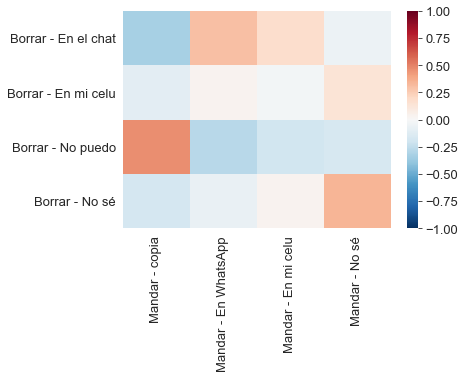

In [74]:
sns.heatmap(df_binary_borrar_mandar.corr().iloc[:4,4:], cmap='RdBu_r', vmax=1, vmin=-1);

In [75]:
cross_tab_result = pd.crosstab(index=df_binary_borrar_mandar['Borrar - No puedo'], 
                               columns=df_binary_borrar_mandar['Mandar - copia'])
cross_tab_result

Mandar - copia,0,1
Borrar - No puedo,,
0,65,24
1,14,41


In [76]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")

chi square result: 0.00 (chi2: 29.18)


In [77]:
expected

array([[48.82638889, 40.17361111],
       [30.17361111, 24.82638889]])

In [78]:
cross_tab_result = pd.crosstab(index=df_binary_borrar_mandar['Borrar - No sé'], 
                               columns=df_binary_borrar_mandar['Mandar - No sé'])
cross_tab_result

Mandar - No sé,0,1
Borrar - No sé,,
0,120,12
1,6,6


In [79]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")

chi square result: 0.00 (chi2: 13.30)


In [80]:
expected

array([[115.5,  16.5],
       [ 10.5,   1.5]])

In [81]:
cross_tab_result = pd.crosstab(index=df_binary_borrar_mandar['Borrar - En el chat'], 
                               columns=df_binary_borrar_mandar['Mandar - En WhatsApp'])
cross_tab_result

Mandar - En WhatsApp,0,1
Borrar - En el chat,,
0,54,15
1,37,38


In [82]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")

chi square result: 0.00 (chi2: 11.72)


In [83]:
expected

array([[43.60416667, 25.39583333],
       [47.39583333, 27.60416667]])

In [84]:
# df_binary_borrar_mandar = df_binary_borrar_mandar.rename(columns={"a_borrar_fotos_enelchat": "Borrar - En el chat",
#                                   "a_borrar_fotos_enmicelu": "Borrar - En mi celu",
#                                   "a_borrar_fotos_nopuedo": "Borrar - No puedo",
#                                   "a_borrar_fotos_nose": "Borrar - No sé",
#                                   "a_mandar_fotos_copia": "Mandar - copia",
#                                   "a_mandar_fotos_enwa": "Mandar - En WhatsApp",
#                                   "a_mandar_fotos_laveenmicelu": "Mandar - En mi celu",
# #                                   "a_mandar_fotos_nose": "Mandar - No sé"})

In [85]:
cross_tab_result = pd.crosstab(index=df_binary_borrar_mandar['Borrar - En el chat'], 
                               columns=df_binary_borrar_mandar['Mandar - copia'])
cross_tab_result

Mandar - copia,0,1
Borrar - En el chat,,
0,26,43
1,53,22


In [86]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")

chi square result: 0.00 (chi2: 14.49)


In [87]:
expected

array([[37.85416667, 31.14583333],
       [41.14583333, 33.85416667]])

In [88]:
cross_tab_result = pd.crosstab(index=df_binary_borrar_mandar['Borrar - No puedo'], 
                               columns=df_binary_borrar_mandar['Mandar - En WhatsApp'])
cross_tab_result

Mandar - En WhatsApp,0,1
Borrar - No puedo,,
0,47,42
1,44,11


In [89]:
chi2, p_value, dof, expected = chi2_contingency(cross_tab_result)
print(f"chi square result: {p_value:.2f} (chi2: {chi2:.2f})")

chi square result: 0.00 (chi2: 9.67)


In [90]:
expected

array([[56.24305556, 32.75694444],
       [34.75694444, 20.24305556]])